In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
from ast import literal_eval

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [2]:
from mlrose_hiive import RHCRunner

In [3]:
# # Generate a new 8-Queen problem using a fixed seed.
# problem = QueensGenerator().generate(seed=123456, size=8)

# # create a runner class and solve the problem
# sa = SARunner(problem=problem,FEvals=True,
#               experiment_name='queens8_sa',
#               output_directory=None, # note: specify an output directory to have results saved to disk
#               seed=123456,
#               iteration_list=2 ** np.arange(11),
#               max_attempts=500,
#               temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0],
#               decay_list=[mlrose_hiive.GeomDecay])

# # the two data frames will contain the results
# df_run_stats, df_run_curves = sa.run()

In [4]:
# df_run_stats.columns

In [5]:
# HTML(df_run_stats[['Iteration', 'Fitness',  'Time', 'State']][0:12].to_html())


In [6]:
# state_sample = df_run_stats[['schedule_current_value', 'schedule_init_temp', 'schedule_min_temp']][:1]
# HTML(state_sample.to_html())


In [7]:
# Generate a new Max K problem using a fixed seed.
problem = MaxKColorGenerator().generate(seed=123456, number_of_nodes=25, max_connections_per_node=3, max_colors=3)

In [8]:
# nx.draw(problem.source_graph,
#         pos=nx.spring_layout(problem.source_graph, seed = 3))

In [9]:
# GARunner(fe)
output_directory="Results"

In [10]:
import time

In [11]:
ga = GARunner(problem=problem,
#               FEvals=True,
              experiment_name='max_k25MIN_ga',maximize=False,
              output_directory="Results", # note: specify an output directory to have results saved to disk
              seed=123456,
              iteration_list=2 ** np.arange(11),
                population_sizes=[10, 20, 50,100,150,200,300],
              mutation_rates=np.arange(0,0.4,0.015))

# the two data frames will contain the results
start = time.time()
# df_run_stats_ga, df_run_curves_ga = ga.run()
# df_run_stats_sa, df_run_curves_sa = sa.run()
# rhc_run_stats, rhc_run_curves = rhc.run()
df_run_stats_ga, df_run_curves_ga = ga.run()
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)

# program body ends

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")







Runtime of the program is 1997.0669116973877


In [12]:
df_run_stats_ga.columns

Index(['Iteration', 'Fitness', 'Time', 'State', 'Population Size',
       'Mutation Rate', 'max_iters', 'maximize', 'FEvals'],
      dtype='object')

In [13]:
HTML(df_run_stats_ga[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']][0:1].to_html())


,Iteration,Fitness,FEvals,Time,State
0,0,24.0,10,0.000887,"[1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0]"


In [14]:
state_sample_ga = df_run_stats_ga[['Population Size', 'Mutation Rate']][:1]
HTML(state_sample_ga.to_html())

,Population Size,Mutation Rate
0,10,0.0


In [15]:
best_fitness_ga = df_run_curves_ga['Fitness'].max()
best_runs_ga = df_run_curves_ga[df_run_curves_ga['Fitness'] == best_fitness_ga]

HTML(best_runs_ga.to_html())

,Iteration,Time,Fitness,Population Size,Mutation Rate,max_iters,maximize,FEvals
0,0,0.000887,24.0,10,0.000,1024,False,10
507,0,0.000887,24.0,10,0.015,1024,False,10
1099,0,0.000887,24.0,10,0.030,1024,False,10
2124,0,0.000887,24.0,10,0.045,1024,False,10
3056,0,0.000887,24.0,10,0.060,1024,False,10
3812,0,0.000887,24.0,10,0.075,1024,False,10
4473,0,0.000887,24.0,10,0.090,1024,False,10
5364,0,0.000887,24.0,10,0.105,1024,False,10
6389,0,0.000887,24.0,10,0.120,1024,False,10
7378,0,0.000887,24.0,10,0.135,1024,False,10


This gives us nine candidates for the best run. We are going to pick the one with that reached the best fitness value in the fewest number of evaluations.

(We could also have chosen to use Iterations as our criteria.)



In [16]:

minimum_evaluations = best_runs_ga['FEvals'].min()

best_curve_run = best_runs_ga[best_runs_ga['FEvals'] == minimum_evaluations]

In [17]:
HTML(best_curve_run.to_html())


,Iteration,Time,Fitness,Population Size,Mutation Rate,max_iters,maximize,FEvals
0,0,0.000887,24.0,10,0.000,1024,False,10
507,0,0.000887,24.0,10,0.015,1024,False,10
1099,0,0.000887,24.0,10,0.030,1024,False,10
2124,0,0.000887,24.0,10,0.045,1024,False,10
3056,0,0.000887,24.0,10,0.060,1024,False,10
3812,0,0.000887,24.0,10,0.075,1024,False,10
4473,0,0.000887,24.0,10,0.090,1024,False,10
5364,0,0.000887,24.0,10,0.105,1024,False,10
6389,0,0.000887,24.0,10,0.120,1024,False,10
7378,0,0.000887,24.0,10,0.135,1024,False,10


In [18]:
best_mr = best_curve_run['Mutation Rate'].iloc()[0]
best_pop_size = best_curve_run['Population Size'].iloc()[0]
print(f'Best Mutation Rate: {best_mr}, best Population Size: {best_pop_size}')


Best Mutation Rate: 0.0, best Population Size: 10


In [19]:
run_stats_best_run = df_run_stats_ga[(df_run_stats_ga['Mutation Rate'] == best_mr) & (df_run_stats_ga['Population Size'] == best_pop_size)]
HTML(run_stats_best_run[['Iteration', 'Fitness', 'FEvals', 'Time']].to_html())

,Iteration,Fitness,FEvals,Time
0,0,24.0,10,0.000887
1,1,11.0,22,0.012578
2,2,10.0,34,0.021714
3,4,9.0,57,0.030574
4,8,7.0,103,0.043702
5,16,7.0,191,0.059267
6,32,7.0,367,0.084691
7,64,7.0,719,0.130168
8,128,7.0,1423,0.216758
9,256,7.0,2831,0.383903


In [20]:
best_state = run_stats_best_run[['State']][:1]
HTML(best_state.to_html())

,State
0,"[1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0]"


In [21]:
print([n for n in problem.source_graph.nodes])

[0, 7, 17, 1, 14, 19, 2, 12, 21, 3, 16, 4, 5, 6, 9, 18, 8, 10, 24, 13, 11, 23, 15, 20, 22]


In [22]:
color_indexes = literal_eval(run_stats_best_run['State'].tail(1).values[0])
ordered_state = [color_indexes[n] for n in problem.source_graph.nodes]
print(ordered_state)


[0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0]


In [23]:
G = nx.path_graph(50)
G.number_of_edges()

49

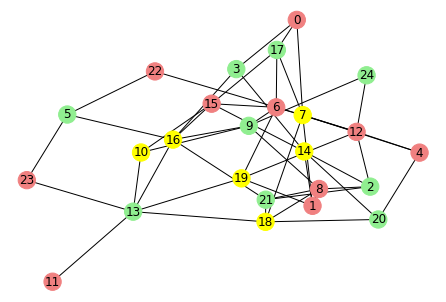

In [24]:
colors = ['lightcoral', 'lightgreen', 'yellow']
node_color_map = [colors[s] for s in ordered_state]

nx.draw(problem.source_graph,
        pos=nx.spring_layout(problem.source_graph, seed = 3),
        with_labels=True,
        node_color=node_color_map)

In [25]:
# best_state, best_fitness, fitness_curve, fitness_evals = mlrose_hiive.simulated_annealing(problem,max_attempts=10, max_iters=1000, init_state=[0]
#                                                                                           , random_state=1, curve=True, fevals=True)

In [26]:
sa = SARunner(problem=problem,
              experiment_name='max_k25MIN_sa',maximize=False,
              output_directory="Results", # note: specify an output directory to have results saved to disk
              seed=123456,
              iteration_list=2 ** np.arange(11),
              max_attempts=1000,
        temperature_list=[100 ,1000,100000,10000,1000000,10000000,100000000],
              decay_list=[mlrose_hiive.GeomDecay])

# the two data frames will contain the results


In [27]:
# the two data frames will contain the results
start = time.time()
# df_run_stats_ga, df_run_curves_ga = ga.run()
# df_run_stats_sa, df_run_curves_sa = sa.run()
# rhc_run_stats, rhc_run_curves = rhc.run()
df_run_stats_sa, df_run_curves_sa = sa.run()
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)

# program body ends

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")




Runtime of the program is 6.389384746551514


In [28]:
# df_run_stats_sa.columns

In [29]:
# sa.best_state

In [30]:
# HTML(df_run_stats_sa[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']][0:1].to_html())




In [31]:
# state_sample_sa = df_run_stats_sa[['schedule_current_value', 'schedule_init_temp', 'schedule_min_temp']][:1]
# HTML(state_sample_sa.to_html())


In [32]:
# # state_sample_sa = df_run_stats_sa[['Population Size', 'Mutation Rate']][:1]
# # HTML(state_sample_sa.to_html())

# best_fitness_sa = df_run_curves_sa['Fitness'].max()
# best_runs_sa = df_run_curves_sa[df_run_curves_sa['Fitness'] == best_fitness_sa]

# HTML(best_runs_sa.to_html())


# minimum_evaluations = best_runs_sa['FEvals'].min()

# best_curve_run = best_runs_sa[best_runs_sa['FEvals'] == minimum_evaluations]

# HTML(best_curve_run.to_html())


In [33]:

# best_init_temperature = best_curve_run['Temperature'].iloc()[0].init_temp

# print(f'Best initial temperature: {best_init_temperature}')

In [34]:

# run_stats_best_run = df_run_stats_sa[df_run_stats_sa['schedule_init_temp'] == best_init_temperature]
# HTML(run_stats_best_run[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']].to_html())

In [35]:
# best_state = run_stats_best_run[['schedule_current_value', 'schedule_init_temp', 'schedule_min_temp']][:1]
# HTML(best_state.to_html())

In [36]:

# print([n for n in problem.source_graph.nodes])

# color_indexes = literal_eval(run_stats_best_run['State'].tail(1).values[0])
# ordered_state = [color_indexes[n] for n in problem.source_graph.nodes]
# print(ordered_state)


# colors = ['lightcoral', 'lightgreen', 'yellow']
# node_color_map = [colors[s] for s in ordered_state]

# nx.draw(problem.source_graph,
#         pos=nx.spring_layout(problem.source_graph, seed = 3),
#         with_labels=True,
#         node_color=node_color_map)

# RHC

In [37]:
rhc = RHCRunner(problem=problem,
                       experiment_name="maxk25MIN_RHC",maximize=False,
#                        output_directory="/Users/matthieudivet/Desktop/GaTech/Classes/ML/Assignments/Randomized_optimization/knapsack_problem",
                             output_directory="Results",
                seed=123456,
                       iteration_list=2 ** np.arange(11),
                       max_attempts=1000,
                            restart_list=[0,1,10,100,50,75,30])




In [38]:
# the two data frames will contain the results
start = time.time()
# df_run_stats_ga, df_run_curves_ga = ga.run()
# df_run_stats_sa, df_run_curves_sa = sa.run()
# rhc_run_stats, rhc_run_curves = rhc.run()
rhc_run_stats, rhc_run_curves = rhc.run()
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)

# program body ends

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")




Runtime of the program is 497.44953966140747


In [39]:
# df_run_stats_ga.columns

In [40]:
# rhc_run_stats.columns

In [41]:


# HTML(rhc_run_stats[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']][0:1].to_html())




# state_sample_sa = rhc_run_stats[['Restarts','current_restart']][:1]
# HTML(state_sample_sa.to_html())

In [42]:
# best_fitness_sa = rhc_run_curves['Fitness'].max()
# best_runs_sa = rhc_run_curves[rhc_run_curves['Fitness'] == best_fitness_sa]

# HTML(best_runs_sa.to_html())

In [43]:



# # state_sample_sa = rhc_run_stats[['Population Size', 'Mutation Rate']][:1]
# # HTML(state_sample_sa.to_html())




# minimum_evaluations = best_runs_sa['FEvals'].min()

# best_curve_run = best_runs_sa[best_runs_sa['FEvals'] == minimum_evaluations]

# HTML(best_curve_run.to_html())



# best_init_temperature = best_curve_run['Temperature'].iloc()[0].init_temp

# print(f'Best initial temperature: {best_init_temperature}')


# run_stats_best_run = rhc_run_stats[rhc_run_stats['schedule_init_temp'] == best_init_temperature]
# HTML(run_stats_best_run[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']].to_html())

# best_state = run_stats_best_run[['schedule_current_value', 'schedule_init_temp', 'schedule_min_temp']][:1]
# HTML(best_state.to_html())


# print([n for n in problem.source_graph.nodes])

# color_indexes = literal_eval(run_stats_best_run['State'].tail(1).values[0])
# ordered_state = [color_indexes[n] for n in problem.source_graph.nodes]
# print(ordered_state)


# colors = ['lightcoral', 'lightgreen', 'yellow']
# node_color_map = [colors[s] for s in ordered_state]

# nx.draw(problem.source_graph,
#         pos=nx.spring_layout(problem.source_graph, seed = 3),
#         with_labels=True,
#         node_color=node_color_map)

# MIMIC

In [48]:
from mlrose_hiive import MIMICRunner

In [49]:
mimic = MIMICRunner(problem=problem,
                           experiment_name="maxk25MIN_MIMIC",
#                            output_directory="/Users/matthieudivet/Desktop/GaTech/Classes/ML/Assignments/Randomized_optimization/knapsack_problem",
                                   output_directory="Results",
                    seed=123456,
                           iteration_list=2 ** np.arange(22),
                           population_sizes=[200,100,30,50,300,150,300,400],
                           max_attempts=500,
                           keep_percent_list=[0.2,0.3,0.4,0.5,0.6],
                           use_fast_mimic=True)


In [50]:
# the two data frames will contain the results
start = time.time()
# df_run_stats_ga, df_run_curves_ga = ga.run()
# df_run_stats_sa, df_run_curves_sa = sa.run()
# rhc_run_stats, rhc_run_curves = rhc.run()
mimic_run_stats, mimic_run_curves = mimic.run()
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)

# program body ends

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")




Runtime of the program is 434.6143159866333


In [51]:
mimic = MIMICRunner(problem=problem,
                           experiment_name="maxk25MIN_MIMIC_SPECIAL",
#                            output_directory="/Users/matthieudivet/Desktop/GaTech/Classes/ML/Assignments/Randomized_optimization/knapsack_problem",
                                   output_directory="Results",
                    seed=123456,
                           iteration_list=2 ** np.arange(22),
                           population_sizes=[200,100,50,300,150,400],
                           max_attempts=1500,
                           keep_percent_list=[0.2,0.3,0.4],
                           use_fast_mimic=True)


# the two data frames will contain the results
start = time.time()
# df_run_stats_ga, df_run_curves_ga = ga.run()
# df_run_stats_sa, df_run_curves_sa = sa.run()
# rhc_run_stats, rhc_run_curves = rhc.run()
mimic_run_stats, mimic_run_curves = mimic.run()
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)

# program body ends

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")




Runtime of the program is 543.2103204727173
